## Importing necessary modules

In [39]:
import json
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

In [40]:
client_id = '28364a36677e49c8811b8f78cab9a27f'
client_secret = '5a03d8fdb5234460acf6a8491ae8ee0e' 

In [41]:
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [42]:
playlist_id='spotify:playlist:4tNnLzd4WsIvbE58PswNl4'
results = sp.playlist(playlist_id)


## Creating dataset from existing Spotify playlist

In [43]:
# Create a list of song ids
ids = []

for item in results['tracks']['items']:
    track = item['track']['id']
    ids.append(track)

song_meta = {'id':[],'album':[],'name':[],'artist':[],'explicit':[],'popularity':[]}

for song_id in ids:
    # song's meta data
    meta = sp.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)
    
    # album name
    album = meta['album']['name']
    song_meta['album'] += [album]
    
    # song name
    song = meta['name']
    song_meta['name'] += [song]
    
    # artist's name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

song_meta_df=pd.DataFrame.from_dict(song_meta)

# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
final_df=song_meta_df.merge(features_df)
   
    

In [44]:
final_df

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,3eR23VReFzcdmS7TYCrhCe,It Ain't Me (with Selena Gomez),It Ain't Me (with Selena Gomez),"Kygo, Selena Gomez",False,76,0.640,0.533,0,-6.596,...,0.000000,0.0864,0.5150,99.968,audio_features,spotify:track:3eR23VReFzcdmS7TYCrhCe,https://api.spotify.com/v1/tracks/3eR23VReFzcd...,https://api.spotify.com/v1/audio-analysis/3eR2...,3.679683,4
1,7qiZfU4dY1lWllzX7mPBI3,÷ (Deluxe),Shape of You,Ed Sheeran,False,84,0.825,0.652,1,-3.183,...,0.000000,0.0931,0.9310,95.977,audio_features,spotify:track:7qiZfU4dY1lWllzX7mPBI3,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,https://api.spotify.com/v1/audio-analysis/7qiZ...,3.895217,4
2,4iLqG9SeJSnt0cSPICSjxv,Attention,Attention,Charlie Puth,False,7,0.774,0.626,3,-4.432,...,0.000031,0.0848,0.7770,100.041,audio_features,spotify:track:4iLqG9SeJSnt0cSPICSjxv,https://api.spotify.com/v1/tracks/4iLqG9SeJSnt...,https://api.spotify.com/v1/audio-analysis/4iLq...,3.524583,4
3,79cuOz3SPQTuFrp8WgftAu,Illuminate (Deluxe),There's Nothing Holdin' Me Back,Shawn Mendes,False,4,0.857,0.800,2,-4.035,...,0.000000,0.0913,0.9660,121.996,audio_features,spotify:track:79cuOz3SPQTuFrp8WgftAu,https://api.spotify.com/v1/tracks/79cuOz3SPQTu...,https://api.spotify.com/v1/audio-analysis/79cu...,3.324000,4
4,0dA2Mk56wEzDgegdC6R17g,Stay,Stay (with Alessia Cara),"Zedd, Alessia Cara",False,2,0.679,0.634,5,-5.024,...,0.000000,0.1150,0.4980,102.013,audio_features,spotify:track:0dA2Mk56wEzDgegdC6R17g,https://api.spotify.com/v1/tracks/0dA2Mk56wEzD...,https://api.spotify.com/v1/audio-analysis/0dA2...,3.501517,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,48nnRcGWEO5ySlqE17tBYB,Game Of Thrones: Season 7 (Music from the HBO®...,Main Titles,Ramin Djawadi,False,0,0.324,0.766,8,-10.919,...,0.876000,0.0880,0.3060,85.012,audio_features,spotify:track:48nnRcGWEO5ySlqE17tBYB,https://api.spotify.com/v1/tracks/48nnRcGWEO5y...,https://api.spotify.com/v1/audio-analysis/48nn...,1.896217,3
96,1j4kHkkpqZRBwE0A4CN4Yv,Dusk Till Dawn (Radio Edit),Dusk Till Dawn - Radio Edit,"ZAYN, Sia",False,82,0.258,0.437,11,-6.593,...,0.000001,0.1060,0.0967,180.043,audio_features,spotify:track:1j4kHkkpqZRBwE0A4CN4Yv,https://api.spotify.com/v1/tracks/1j4kHkkpqZRB...,https://api.spotify.com/v1/audio-analysis/1j4k...,3.983333,4
97,6KdmNK9MogmGcnO3wNZHhp,Funk Wav Bounces Vol.1,Hard to Love (feat. Jessie Reyez),"Calvin Harris, Jessie Reyez, Funk Wav",True,54,0.753,0.785,2,-6.530,...,0.000191,0.0633,0.8500,148.015,audio_features,spotify:track:6KdmNK9MogmGcnO3wNZHhp,https://api.spotify.com/v1/tracks/6KdmNK9MogmG...,https://api.spotify.com/v1/audio-analysis/6Kdm...,3.843117,4
98,043MJ8zk9VQLvXXV01UbH6,Game On: 2 Player Mode,Fairy Tail Theme,"Taylor Davis, Lara de Wit",False,48,0.289,0.360,5,-13.008,...,0.880000,0.2650,0.3660,119.899,audio_features,spotify:track:043MJ8zk9VQLvXXV01UbH6,https://api.spotify.com/v1/tracks/043MJ8zk9VQL...,https://api.spotify.com/v1/audio-analysis/043M...,3.133333,4


In [45]:
final_df['artist']

0                        Kygo, Selena Gomez
1                                Ed Sheeran
2                              Charlie Puth
3                              Shawn Mendes
4                        Zedd, Alessia Cara
                      ...                  
95                            Ramin Djawadi
96                                ZAYN, Sia
97    Calvin Harris, Jessie Reyez, Funk Wav
98                Taylor Davis, Lara de Wit
99                              Demi Lovato
Name: artist, Length: 100, dtype: object

In [46]:
final_df.shape

(100, 23)

In [47]:
music_feature = features_df[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]


In [48]:
music_feature.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,0.640400,0.683370,-6.090910,0.085453,0.164188,0.045691,0.147080,0.515473,118.58673,3.658083
std,0.144982,0.157751,2.808741,0.070467,0.204452,0.187742,0.103024,0.236646,27.37181,0.962326
min,0.213000,0.054000,-23.420000,0.031000,0.000407,0.000000,0.037100,0.057800,60.38700,0.666000
25%,0.564000,0.617500,-6.702250,0.040075,0.037175,0.000000,0.088600,0.376000,99.98300,3.302058
50%,0.649500,0.715000,-5.642000,0.062050,0.081150,0.000001,0.107500,0.486000,118.48450,3.627508
75%,0.739750,0.788750,-4.421500,0.101500,0.213750,0.000046,0.154750,0.706250,127.98375,3.849275
max,0.965000,0.962000,-2.862000,0.425000,0.988000,0.933000,0.653000,0.966000,200.05600,8.902000


## Feature Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
music_feature.loc[:]=min_max_scaler.fit_transform(music_feature.loc[:])

C:\Users\Pranav.LAPTOP-HOVCQVL6\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Pranav.LAPTOP-HOVCQVL6\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Data Visualization

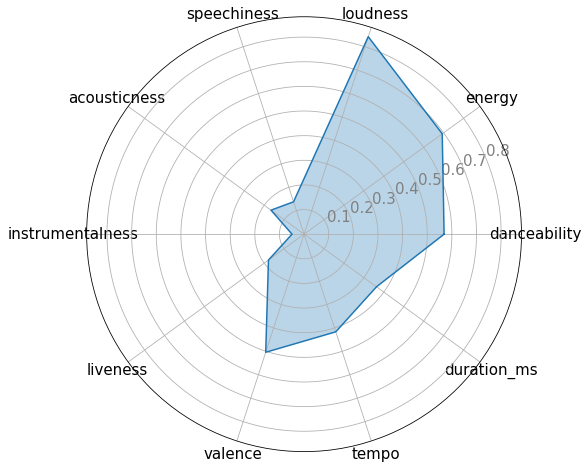

In [50]:
import matplotlib.pyplot as plt
from math import pi

# plot size
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_feature.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_feature.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)



plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

From this chart one can tell that I like music that is loud and energy filled. Also the danceability of the songs is a plus.